In [ ]:
#Base
import pandas as pd
import numpy as np
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
#Disable Warnings
import warnings
warnings.filterwarnings("ignore")

#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
#Train-Test Split
from sklearn.model_selection import train_test_split
#Cross Validation untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold
#Grid Search
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
#Save Model
import pickle
import requests
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [ ]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


In [ ]:
# lets check the shape of the train and test datasets
print("Shape of the Training Data :", train.shape)
print("Shape of the Test Data :", test.shape)

Shape of the Training Data : (54808, 13)
Shape of the Test Data : (23490, 12)


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [ ]:
train[['length_of_service','avg_training_score']].astype(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [ ]:
# lets check descriptive statistics for numerical columns
train.describe().style.background_gradient(cmap = 'Blues')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
# lets check descriptive statistics for categorical columns
train.describe(include = 'object').style.background_gradient(cmap = 'Blues')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


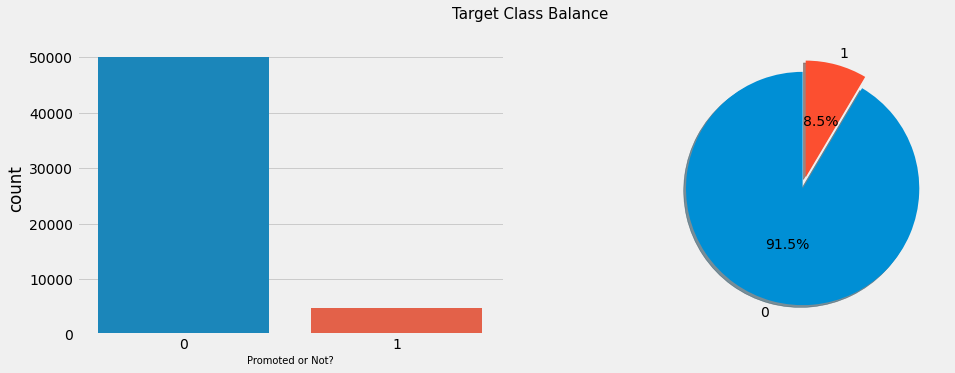

In [ ]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.1f%%', startangle = 90,
                                       labels = ['0','1'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

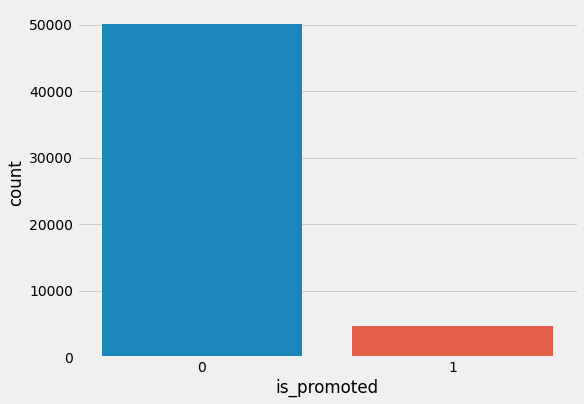

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(train.is_promoted)

##Univariate Analysis

###Department

In [ ]:
#Menghitung jumlah nilai pada column "Department"
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

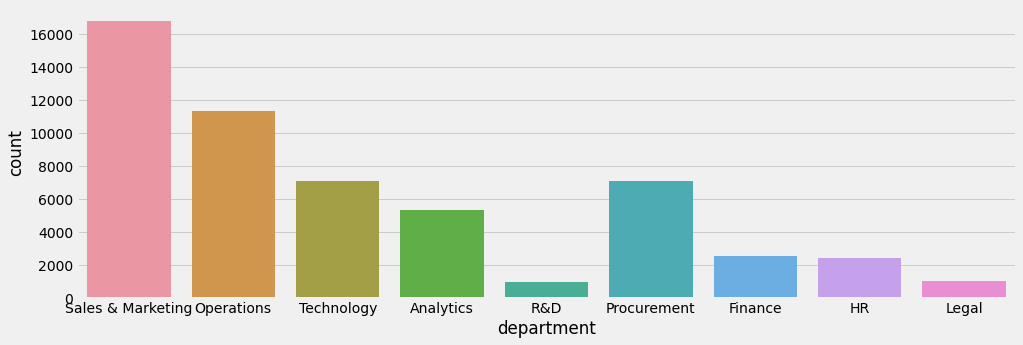

In [ ]:
sns.countplot(data=train, x='department')

In [ ]:
per_promotion = train.groupby(['department', 'is_promoted']).size().to_frame('Total_Per_Promoted')
per_department = train.groupby('department').size().to_frame('Total_Per_department')

joined = per_promotion.join(
    per_department,
    on='department'
).reset_index()

joined['ratio'] = joined['Total_Per_Promoted'] / joined['Total_Per_department']
joined

,department,is_promoted,Total_Per_Promoted,Total_Per_department,ratio
0,Analytics,0,4840,5352,0.904335
1,Analytics,1,512,5352,0.095665
2,Finance,0,2330,2536,0.918770
3,Finance,1,206,2536,0.081230
4,HR,0,2282,2418,0.943755
5,HR,1,136,2418,0.056245
6,Legal,0,986,1039,0.948989
7,Legal,1,53,1039,0.051011
8,Operations,0,10325,11348,0.909852
9,Operations,1,1023,11348,0.090148


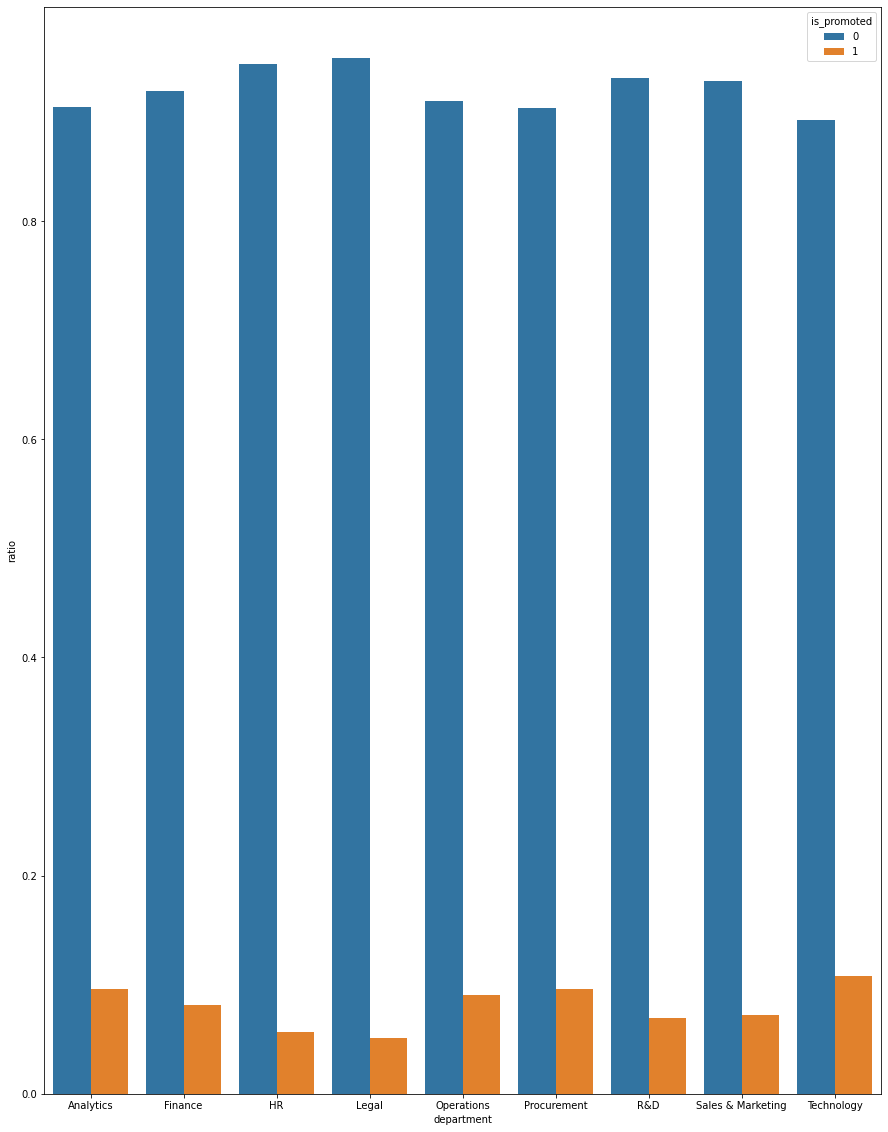

In [ ]:
plt.rcParams['figure.figsize'] = (15,20)
sns.barplot(data=joined, y='ratio', hue='is_promoted', x='department')
plt.show()

###Education

In [ ]:
#Menghitung jumlah nilai pada column "Education"
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
train['education'].fillna('Other', inplace=True)

In [ ]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
per_promoted = train.groupby(['education', 'is_promoted']).size().to_frame('Total_Per_Promoted')
per_education = train.groupby('education').size().to_frame('Total_Per_Education')

joined = per_promoted.join(
    per_education,
    on='education'
).reset_index()

joined['ratio'] = joined['Total_Per_Promoted'] / joined['Total_Per_Education']
joined

,education,is_promoted,Total_Per_Promoted,Total_Per_Education,ratio
0,Bachelor's,0,33661,36669,0.917969
1,Bachelor's,1,3008,36669,0.082031
2,Below Secondary,0,738,805,0.916770
3,Below Secondary,1,67,805,0.083230
4,Master's & above,0,13454,14925,0.901441
5,Master's & above,1,1471,14925,0.098559
6,Other,0,2287,2409,0.949357
7,Other,1,122,2409,0.050643


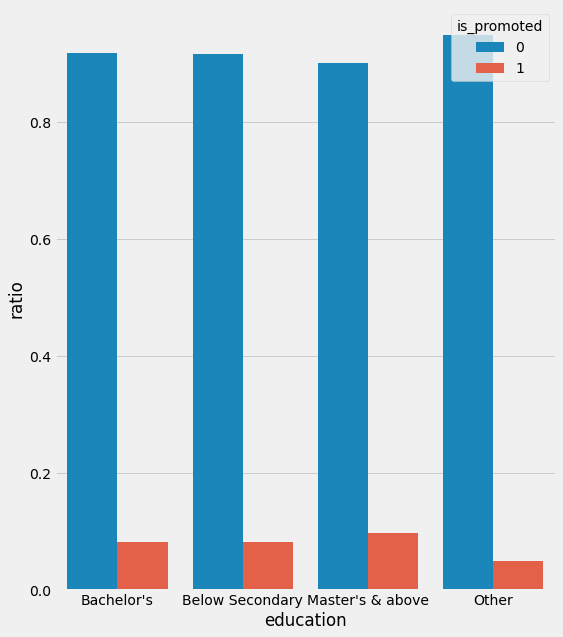

In [ ]:
plt.rcParams['figure.figsize'] = (8,10)
sns.barplot(data=joined, y='ratio', hue='is_promoted', x='education')
plt.show()

###Gender

In [ ]:
#Menghitung jumlah nilai pada column "Gender"
train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [ ]:
per_promoted = train.groupby(['gender', 'is_promoted']).size().to_frame('Total_Per_Promoted')
per_gender = train.groupby('gender').size().to_frame('Total_Per_gender')

joined = per_promoted.join(
    per_gender,
    on='gender'
).reset_index()

joined['ratio'] = joined['Total_Per_Promoted'] / joined['Total_Per_gender']
joined

,gender,is_promoted,Total_Per_Promoted,Total_Per_gender,ratio
0,f,0,14845,16312,0.910066
1,f,1,1467,16312,0.089934
2,m,0,35295,38496,0.916849
3,m,1,3201,38496,0.083151


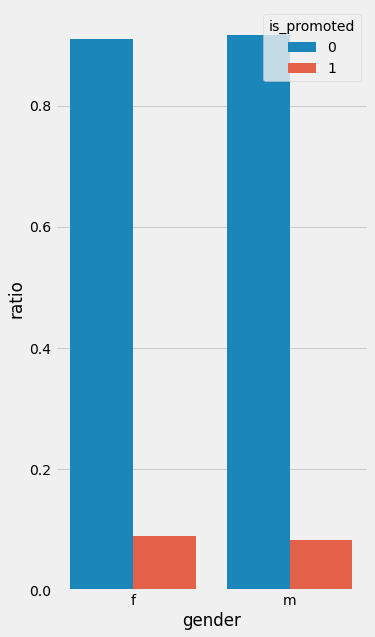

In [ ]:
plt.rcParams['figure.figsize'] = (5,10)
sns.barplot(data=joined, y='ratio', hue='is_promoted', x='gender')
plt.show()

###Recruitment Channel

In [ ]:
#Menghitung jumlah nilai pada column "recruitment_channel"
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [ ]:
per_promoted = train.groupby(['recruitment_channel', 'is_promoted']).size().to_frame('Total_Per_Promoted')
per_recruit = train.groupby('recruitment_channel').size().to_frame('Total_Per_recruit')

joined = per_promoted.join(
    per_recruit,
    on='recruitment_channel'
).reset_index()

joined['ratio'] = joined['Total_Per_Promoted'] / joined['Total_Per_recruit']
joined

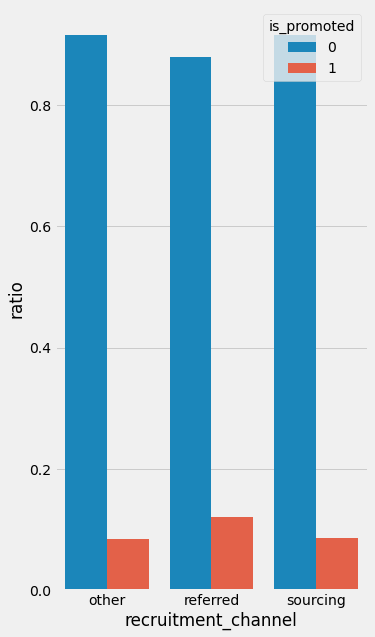

In [ ]:
plt.rcParams['figure.figsize'] = (5,10)
sns.barplot(data=joined, y='ratio', hue='is_promoted', x='recruitment_channel')
plt.show()

###no_of_trainings

In [ ]:
#Menghitung jumlah nilai pada column "no_of_trainings"
train['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

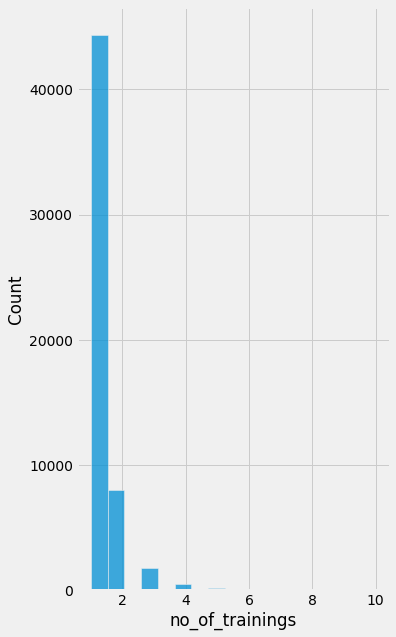

In [ ]:
sns.histplot(train, x='no_of_trainings')

In [ ]:
per_promoted = train.groupby(['no_of_trainings', 'is_promoted']).size().to_frame('Total_Per_Promoted')
per_training = train.groupby('no_of_trainings').size().to_frame('Total_Per_training')

joined = per_promoted.join(
    per_training,
    on='no_of_trainings'
).reset_index()

joined['ratio'] = joined['Total_Per_Promoted'] / joined['Total_Per_training']
joined

,no_of_trainings,is_promoted,Total_Per_Promoted,Total_Per_training,ratio
0,1,0,40468,44378,0.911893
1,1,1,3910,44378,0.088107
2,2,0,7382,7987,0.924252
3,2,1,605,7987,0.075748
4,3,0,1654,1776,0.931306
5,3,1,122,1776,0.068694
6,4,0,442,468,0.944444
7,4,1,26,468,0.055556
8,5,0,125,128,0.976562
9,5,1,3,128,0.023438


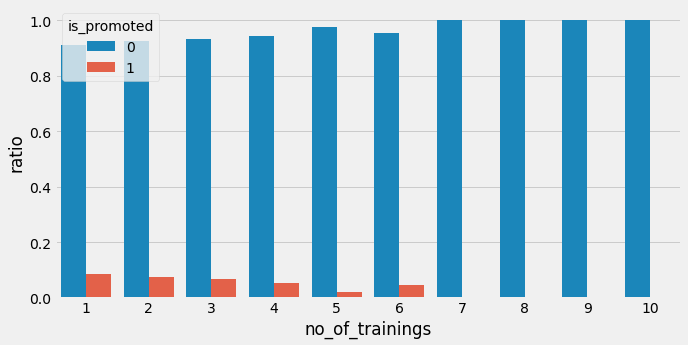

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(data=joined, y='ratio', hue='is_promoted', x='no_of_trainings')
plt.show()

###Age

In [ ]:
#Menghitung jumlah nilai pada column "no_of_trainings"
train['age'].value_counts()

30    3665
32    3534
31    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1923
39    1695
40    1663
25    1299
41    1289
42    1149
43     992
44     847
24     845
45     760
46     697
48     557
47     557
50     521
49     441
23     428
51     389
53     364
52     351
54     313
55     294
56     264
57     238
22     231
60     217
58     213
59     209
20     113
21      98
Name: age, dtype: int64

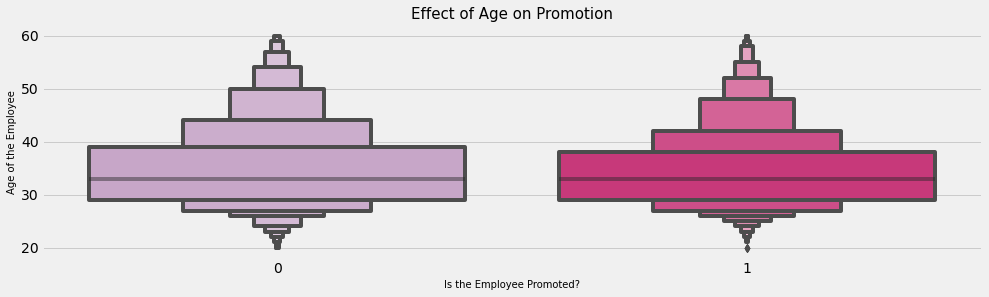

In [ ]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

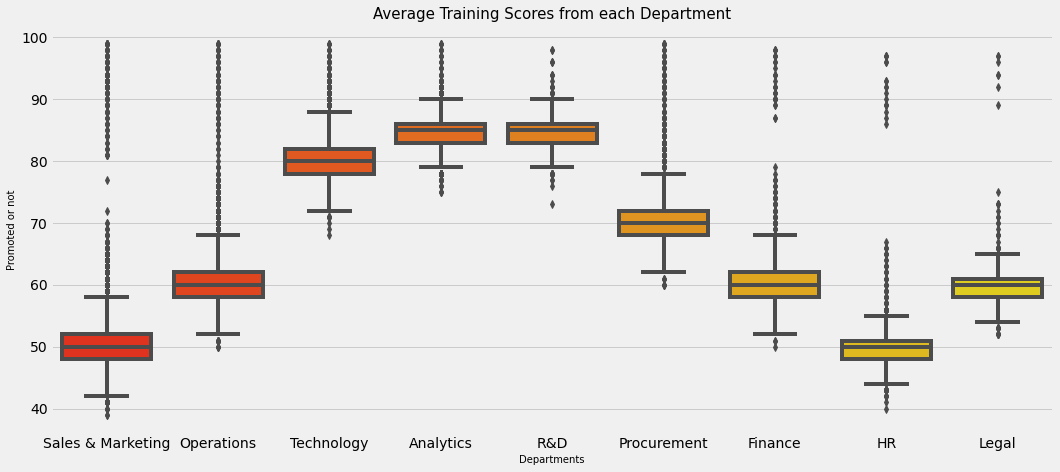

In [ ]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

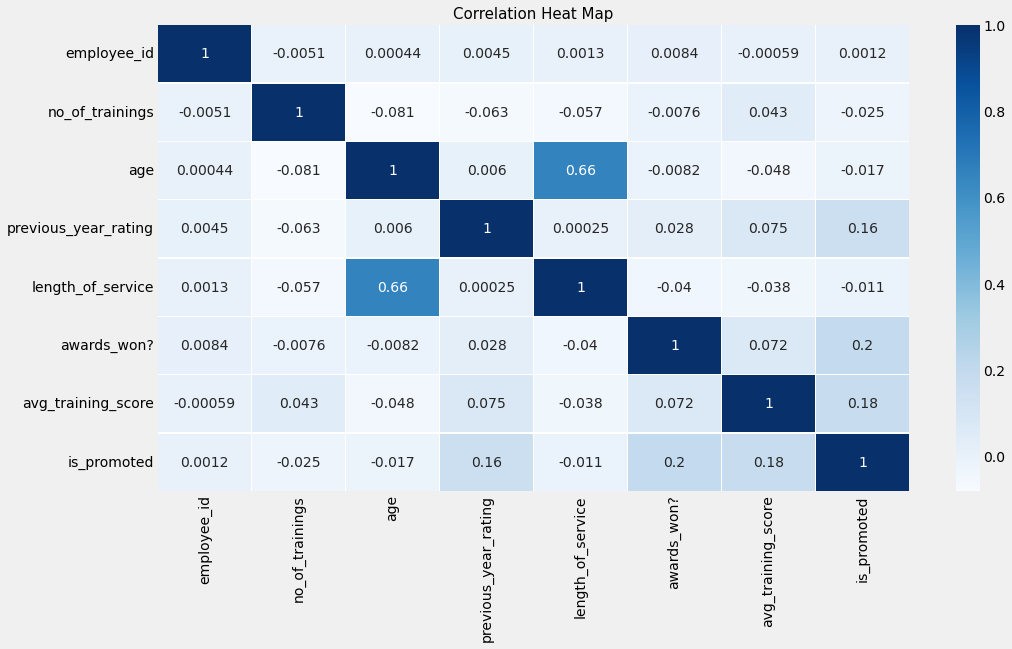

In [ ]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Blues')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

###avg_training_score

In [ ]:
#Menghitung jumlah nilai pada column "avg_training_score"
train['avg_training_score'].value_counts()


50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64

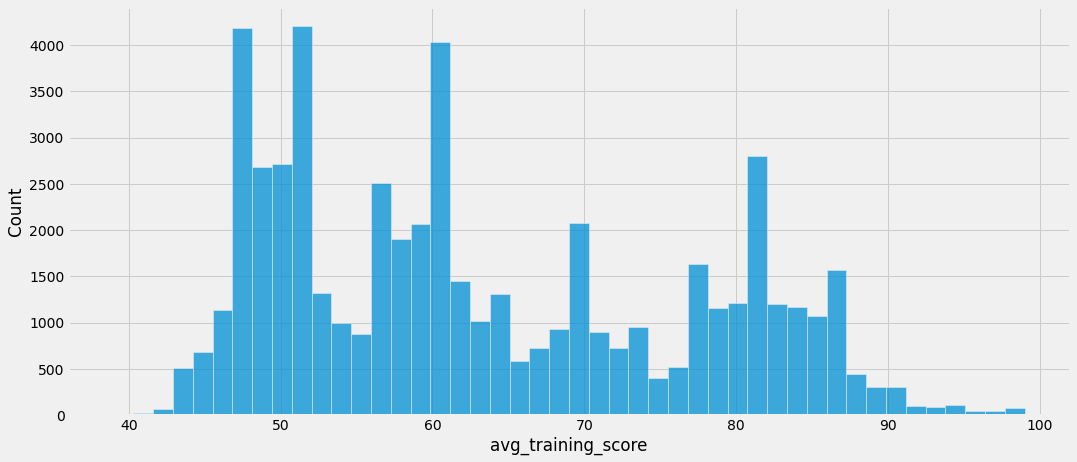

In [ ]:
sns.histplot(train, x='avg_training_score')

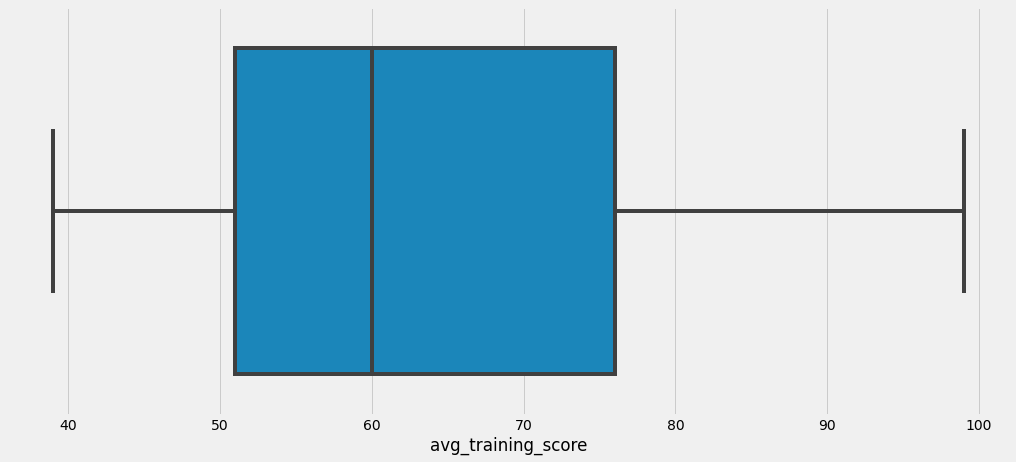

In [ ]:
sns.boxplot(data=train, x='avg_training_score')

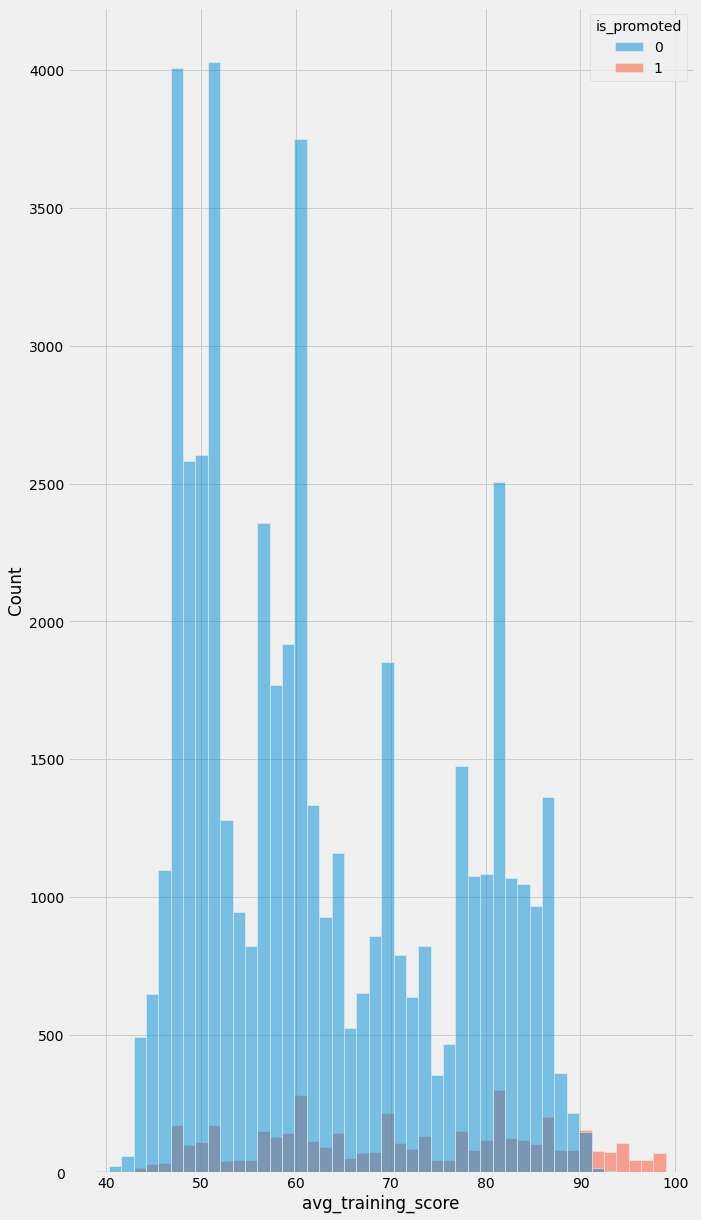

In [ ]:
plt.rcParams['figure.figsize'] = (10,20)
sns.histplot(train, x='avg_training_score', hue='is_promoted')
plt.show()

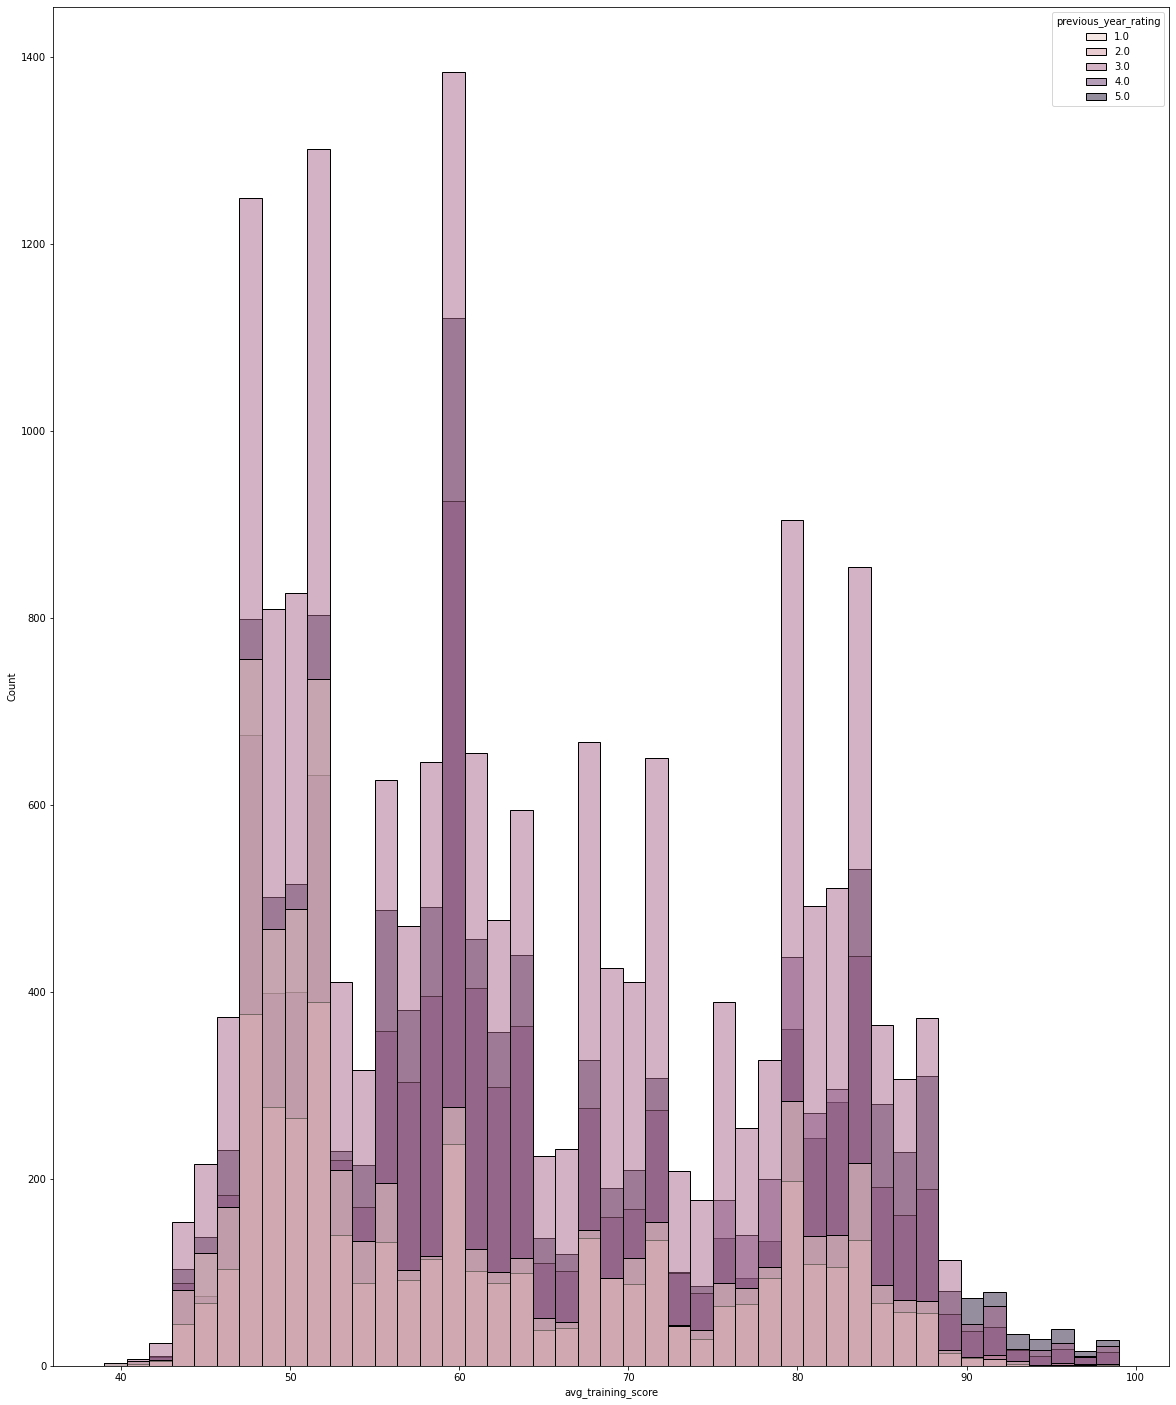

In [ ]:
plt.rcParams['figure.figsize'] = (20,25)
sns.histplot(train, x='avg_training_score', hue='previous_year_rating')
plt.show()

###Length of Service

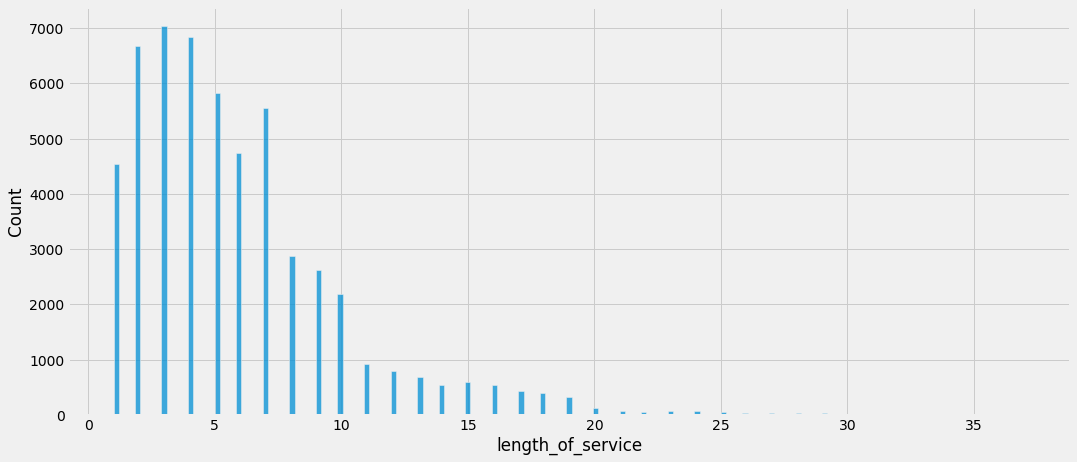

In [ ]:
sns.histplot(train, x='length_of_service')

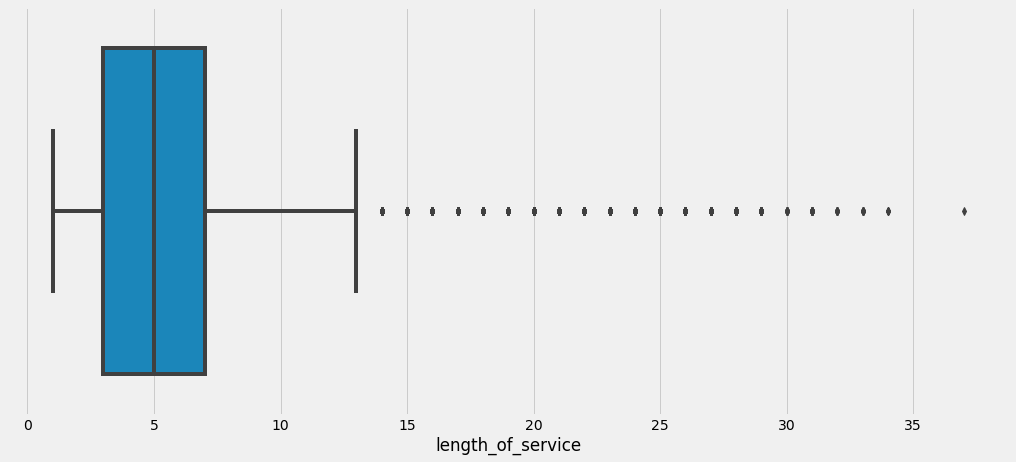

In [ ]:
sns.boxplot(data=train, x='length_of_service')

In [ ]:
# IQR
Q1 = train['length_of_service'].quantile(0.3)
Q3 = train['length_of_service'].quantile(0.7)
IQR = Q3 - Q1
UPPER_LIMIT = Q3 + (1.5 * IQR)
train = train[train['length_of_service'] <= UPPER_LIMIT]

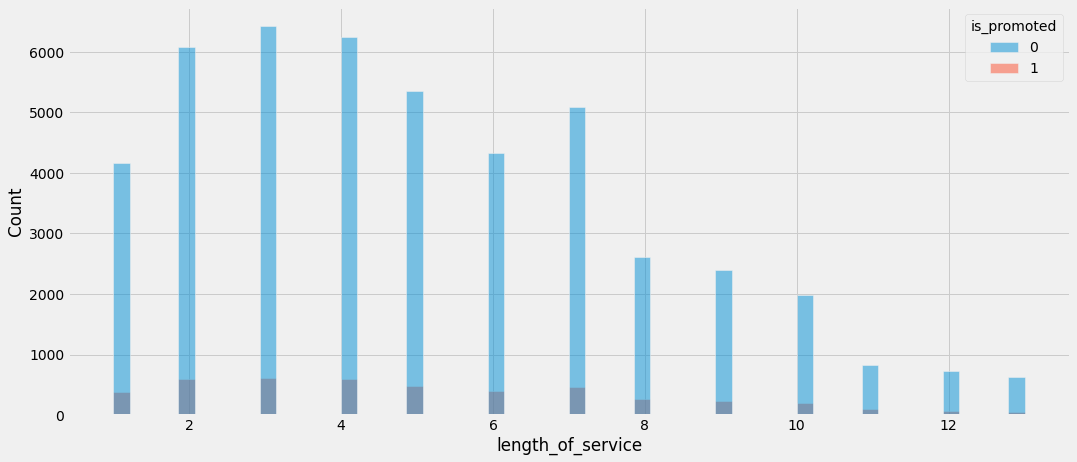

In [ ]:
sns.histplot(train, x='length_of_service', hue='is_promoted')

In [ ]:
# bootstrap
# Ide: dari setiap kelas, kita ambil sample. Kita cari rata-rata/median. 
# Lakukan sebanyak n kali. Rata-rata ini yang akan kita plot.

def bootstrap(train, column):

    BOOTS_RESULT = []
    for i in range(1000):
        # sampling kelas is_promoted = 0
        mean_0 = train[train['is_promoted'] == 0][column].sample(200).mean()
        mean_1 = train[train['is_promoted'] == 1][column].sample(200).mean()

        BOOTS_RESULT.append((mean_0, 0))
        BOOTS_RESULT.append((mean_1, 1))
    train_boots = pd.DataFrame(BOOTS_RESULT, columns=[column, 'is_promoted'])
    return train_boots

train_boots = bootstrap(train, 'length_of_service')

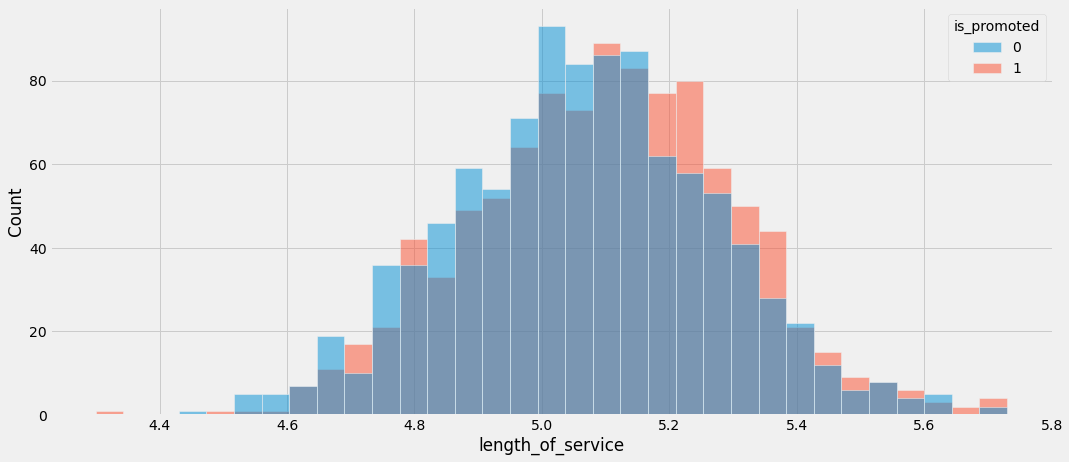

In [ ]:
sns.histplot(train_boots, x='length_of_service', hue='is_promoted')

###Previous Year Rating

In [ ]:
#Menghitung jumlah nilai pada column "previous_year_rating"
train['previous_year_rating'].value_counts()

3.0    17255
5.0    10999
4.0     9192
1.0     5808
2.0     3941
Name: previous_year_rating, dtype: int64

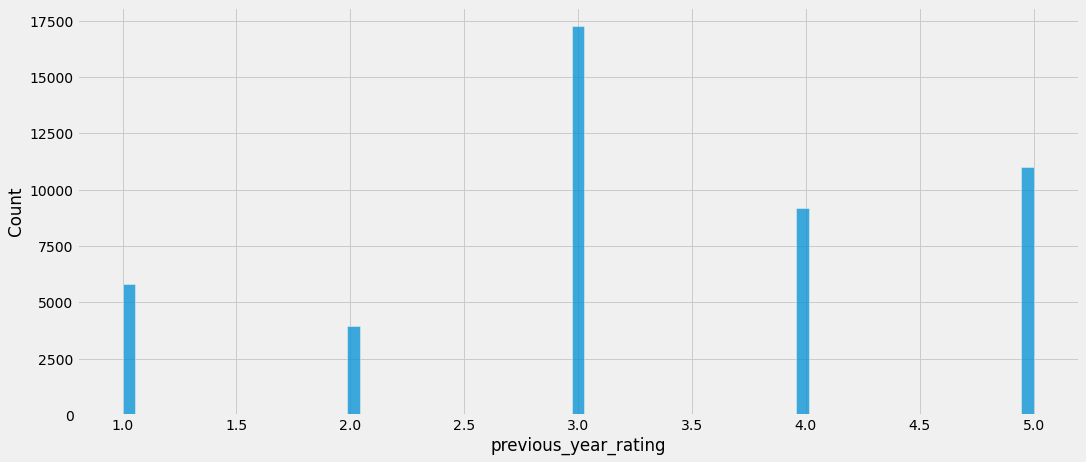

In [ ]:
sns.histplot(train, x='previous_year_rating')

In [ ]:
per_promoted = train.groupby(['previous_year_rating', 'is_promoted']).size().to_frame('Total_Per_Promoted')
per_rating = train.groupby('previous_year_rating').size().to_frame('Total_Per_Rating')

joined = per_promoted.join(
    per_rating,
    on='previous_year_rating'
).reset_index()

joined['ratio'] = joined['Total_Per_Promoted'] / joined['Total_Per_Rating']
joined

,previous_year_rating,is_promoted,Total_Per_Promoted,Total_Per_Rating,ratio
0,1.0,0,6135,6223,0.985859
1,1.0,1,88,6223,0.014141
2,2.0,0,4044,4225,0.957160
3,2.0,1,181,4225,0.042840
4,3.0,0,17263,18618,0.927221
5,3.0,1,1355,18618,0.072779
6,4.0,0,9093,9877,0.920624
7,4.0,1,784,9877,0.079376
8,5.0,0,9820,11741,0.836385
9,5.0,1,1921,11741,0.163615


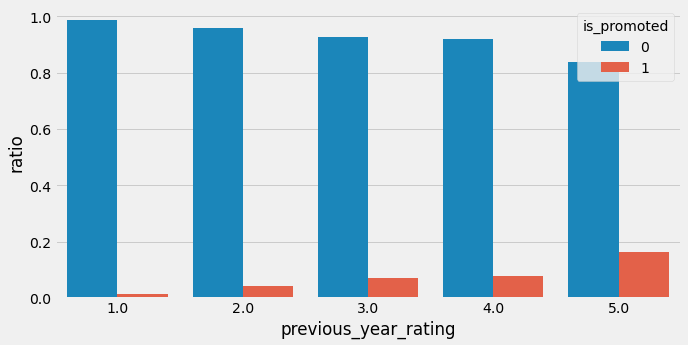

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(data=joined, y='ratio', hue='is_promoted', x='previous_year_rating')
plt.show()

###Awards Won?

In [ ]:
#Menghitung jumlah nilai pada column "awards_won?"
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

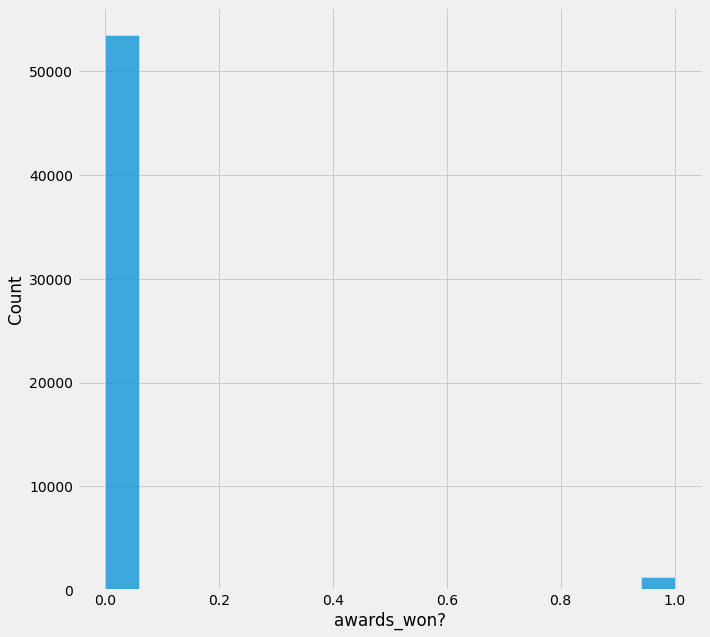

In [ ]:
sns.histplot(train, x='awards_won?')

In [ ]:
per_promoted = train.groupby(['awards_won?', 'is_promoted']).size().to_frame('Total_Per_Promoted')
per_awards = train.groupby('awards_won?').size().to_frame('Total_Per_Awards')

joined = per_promoted.join(
    per_awards,
    on='awards_won?'
).reset_index()

joined['ratio'] = joined['Total_Per_Promoted'] / joined['Total_Per_Awards']
joined

,awards_won?,is_promoted,Total_Per_Promoted,Total_Per_Awards,ratio
0,0,0,49429,53538,0.923251
1,0,1,4109,53538,0.076749
2,1,0,711,1270,0.559843
3,1,1,559,1270,0.440157


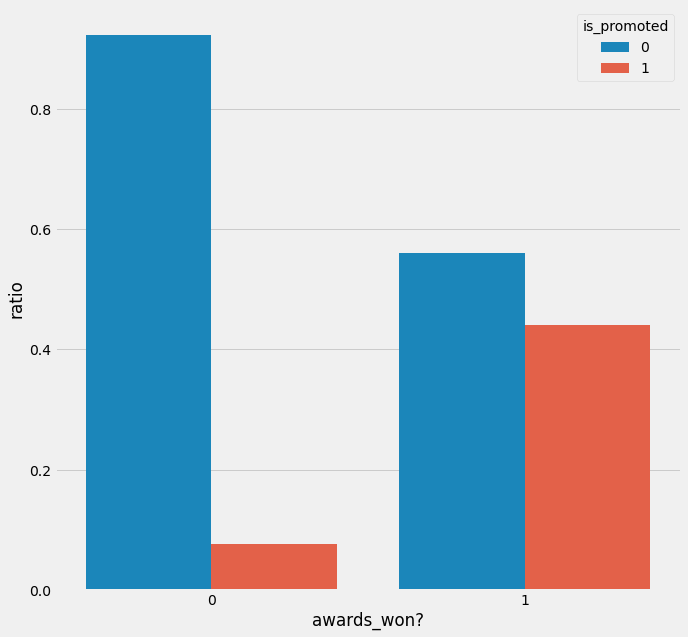

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(data=joined, y='ratio', hue='is_promoted', x='awards_won?')
plt.show()

In [ ]:
per_rating = train.groupby(['awards_won?', 'previous_year_rating']).size().to_frame('Total_Per_rating')
per_awards = train.groupby('previous_year_rating').size().to_frame('Total_Per_Awards')

joined = per_rating.join(
    per_awards,
    on='previous_year_rating'
).reset_index()

joined['ratio'] = joined['Total_Per_rating'] / joined['Total_Per_Awards']
joined

,awards_won?,previous_year_rating,Total_Per_rating,Total_Per_Awards,ratio
0,0,1.0,6114,6223,0.982484
1,0,2.0,4152,4225,0.982722
2,0,3.0,18211,18618,0.978139
3,0,4.0,9651,9877,0.977119
4,0,5.0,11382,11741,0.969423
5,1,1.0,109,6223,0.017516
6,1,2.0,73,4225,0.017278
7,1,3.0,407,18618,0.021861
8,1,4.0,226,9877,0.022881
9,1,5.0,359,11741,0.030577


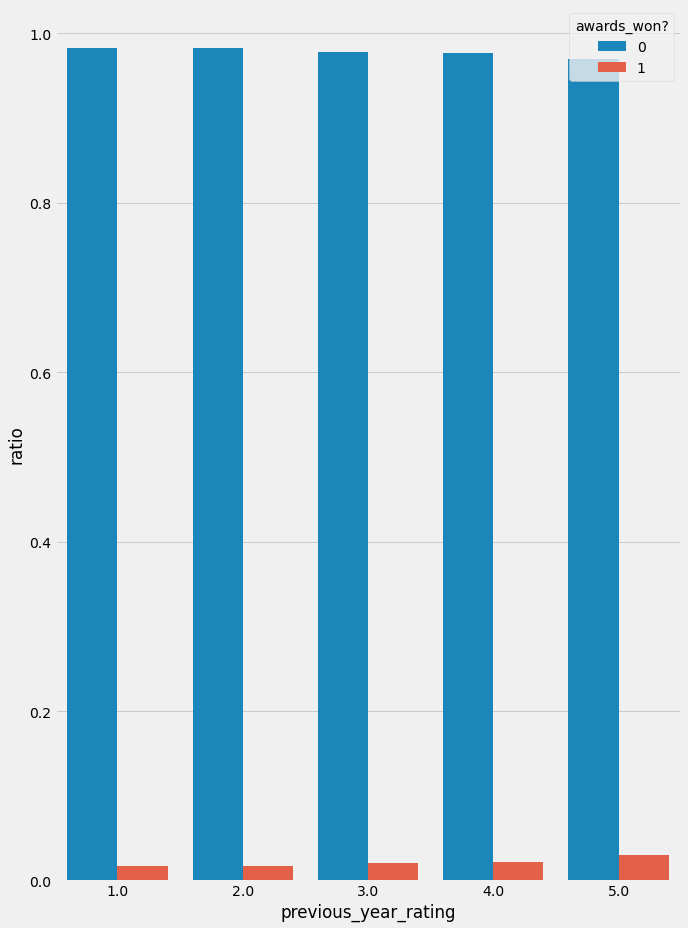

In [ ]:
plt.rcParams['figure.figsize'] = (10,15)
sns.barplot(data=joined, y='ratio', hue='awards_won?', x='previous_year_rating')
plt.show()

##Preprocessing Data

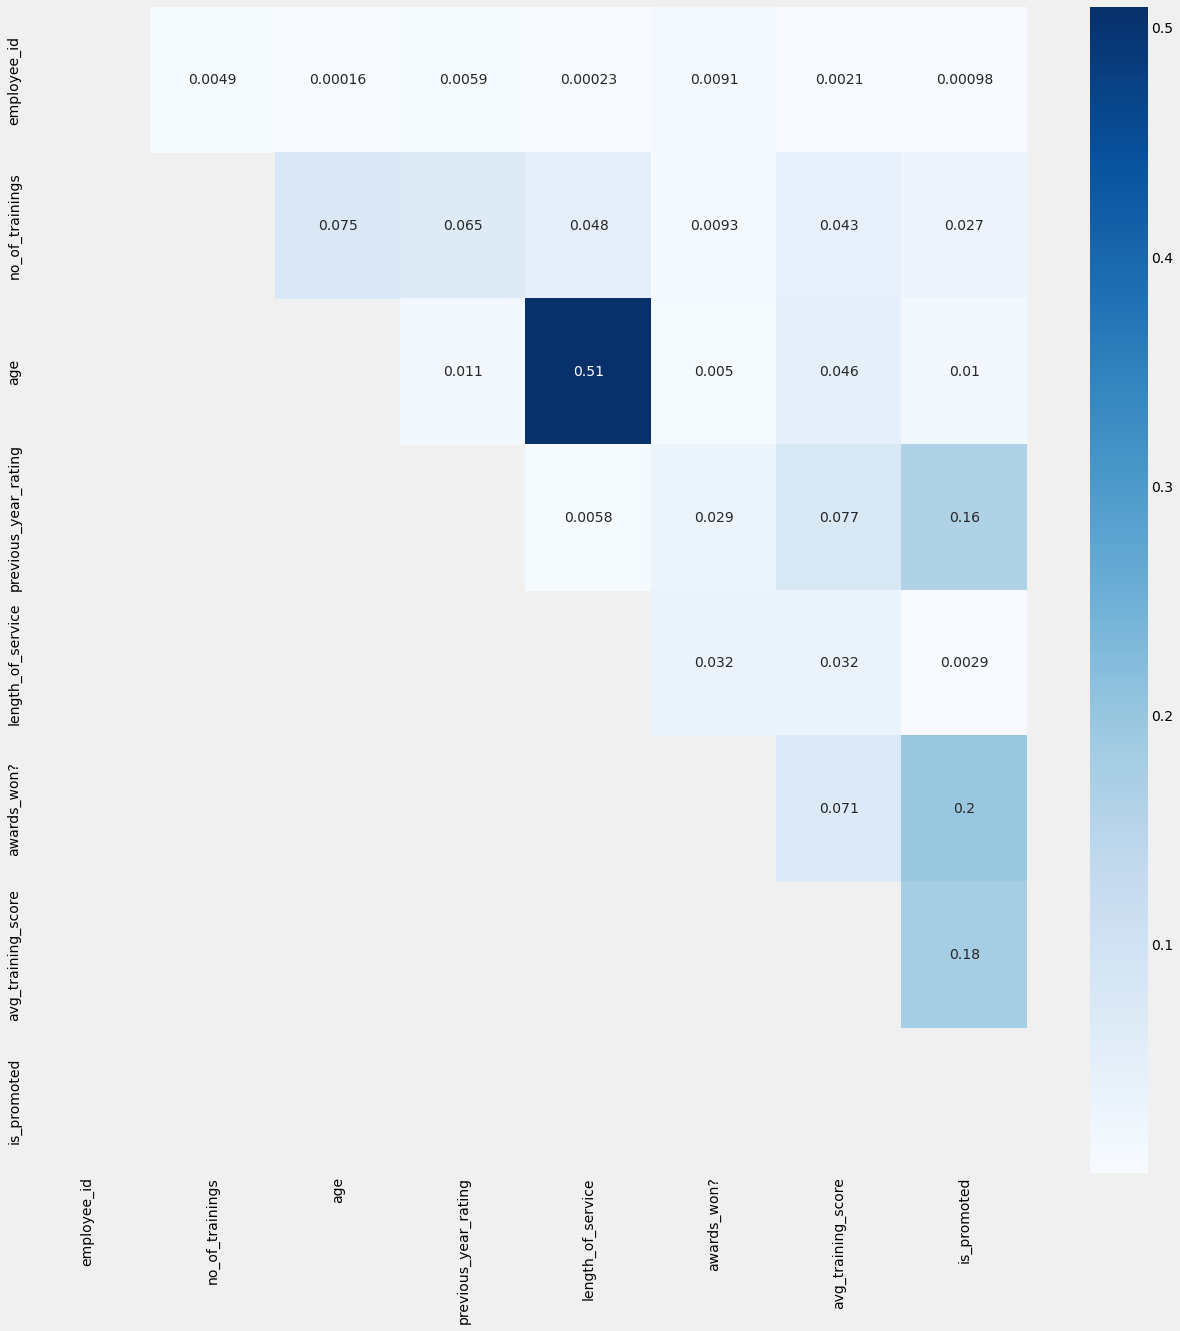

In [ ]:
# Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap='Blues')

In [ ]:
y= train['is_promoted']
X= train.drop(['employee_id','department','region', 'is_promoted' ],1)
X

In [ ]:
X.isna().sum()

In [ ]:
X['education'].fillna('Other', inplace=True)

In [ ]:
X['education'].unique()

In [ ]:
X['previous_year_rating'].mean()

In [ ]:
X['previous_year_rating'].fillna(3.000, inplace=True)
X['previous_year_rating']

In [ ]:
X.isna().sum()

In [ ]:
X['education'] = X['education'].replace({"Bachelor's":0, "Master's & above":1, 'Below Secondary':2, 'Other':3})
X['education']

In [ ]:
X['gender'] = X['gender'].replace({'f':0, 'm':1})
X['gender']

In [ ]:
X['recruitment_channel'].unique()

In [ ]:
X['recruitment_channel']= X['recruitment_channel'].replace({'sourcing':0 , 'other':1 , 'referred':2 })
X['recruitment_channel']

In [ ]:
y

In [ ]:
df['is_promoted'].value_counts()

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

In [ ]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)